## Тестовое задание для Сбермаркета. Часть 1

### Задача:
 Представь, что ты главный аналитик в компании и собираешь дашборд с ключевыми метриками (от 4 до 6) для СЕО, на основании которых он будет судить о "здоровье" бизнеса, эффективности текущих операций и т.д. каждый день.
 Исходя из специфики индустрии и бизнес-модели СберМаркета, какие метрики ты бы отразил? Коротко можно объяснить почему.
 
### Ответ:
Я собираю дашборд для CEO компании, значит метрики должны быть понятными. Ценность сервиса в том, чтобы доставить продукты быстро покупателю. Следовательно, нужно учитывать метрику скорость доставки, увеличивать сеть партнерских магазинов и количество отмененных заказов. Также количество заказов и их стоимость. Еще я бы смотрела на количество повторных заказов. 

## Тестовое задание для Сбермаркета. Часть 2

### Задача:
Основная задача аналитиков в нашей компании - растить бизнес. Иногда мы сами не знаем где прячутся эти точки кратного роста, поэтому порой приходится кранчить данные и искать зависимости/аномалии, генерировать гипотезы в процессе и потом предлагать проекты. Мы дадим доступ к базе со срезом транзакций. Твое задание: найти все интересные на твой взгляд инсайты и представь их в любом удобном виде (ноутбук желательно приложить). 

### План работы
1. Выгрузить данные
2. Просмотреть каждую таблицу на предмет дублей
3. Проанализировать каждую таблицу
4. Написать вывод

<div class="alert alert-block alert-success">
    
Оглавление:
    
1. [Выгрузка данных](#step1)
2. [Анализ данных](#step2)
    * [Таблица с заказами orders](#step2.1)
    * [Таблица с доставкой del_win](#step2.2)
    * [Таблица с адресами addresses](#step2.3)
    * [Таблица с заменными товарами replacements](#step2.4)
3. [Вывод по проекту](#step3)
    
</div> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

### Выгрузка данных <a id="step1"></a>

In [2]:
db_config = {'user': 'analytics',
             'pwd': 'HRanalytics',
             'host': 'rc1c-fhrb9f1e0l9g611h.mdb.yandexcloud.net',
             'port': 6432, 
             'dbname': 'hr-analytics'} 

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'], db_config['pwd'], db_config['host'], db_config['port'], db_config['dbname'])

engine = create_engine(connection_string)

query1 = '''SELECT *
            FROM orders;
        '''
query2 = '''SELECT *
            FROM delivery_windows;
        '''
query3 = '''SELECT *
            FROM stores;
        '''
query4 = '''SELECT *
            FROM addresses;
        '''
query5 = '''SELECT *
            FROM replacements;
        '''
query6 = '''SELECT *
            FROM cancellations;
        '''
orders = pd.io.sql.read_sql(query1, con = engine)
del_win = pd.io.sql.read_sql(query2, con = engine)
stores = pd.io.sql.read_sql(query3, con = engine)
addresses = pd.io.sql.read_sql(query4, con = engine)
replacements = pd.io.sql.read_sql(query5, con = engine)
cancellations = pd.io.sql.read_sql(query6, con = engine)

In [3]:
#сделала функцию, чтобы за один проход рассмотреть несколько фреймов сразу
def vision_df(list_df):
    for i in list_df:
        print('----------------------------DataFrame---------------------------------')
        print()
        print('Info', i.info())
        print()
        print()
        for col in i.columns:
            print(f'Duplicate in {col}: {i[col].duplicated().sum()}')
        print()
        display(i.head())
        print('------------------------------------------------------------------------')
        print('------------------------------------------------------------------------')

In [4]:
list_df = [orders, del_win, stores, addresses, replacements, cancellations]

In [5]:
vision_df(list_df)

----------------------------DataFrame---------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334245 entries, 0 to 334244
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  334245 non-null  int64         
 1   user_id             334245 non-null  int64         
 2   total_cost          334245 non-null  float64       
 3   cost                334245 non-null  float64       
 4   item_total          334245 non-null  int64         
 5   promo_total         334245 non-null  float64       
 6   total_weight        334245 non-null  int64         
 7   total_quantity      334245 non-null  int64         
 8   state               334245 non-null  object        
 9   shipped_at          334245 non-null  datetime64[ns]
 10  created_at          334245 non-null  datetime64[ns]
 11  ship_address_id     334245 non-null  int64         
 12  store_id      

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
0,3158715,61138,290.0,290.0,2543,0.0,89906,35,shipped,2018-01-05 10:50:00,2018-01-05 00:07:04,448086,2,75258.0
1,3182881,73307,190.0,190.0,6076,0.0,30275,52,shipped,2018-01-06 15:33:54,2018-01-05 02:04:42,450946,10,75860.0
2,3146329,75386,290.0,290.0,2617,0.0,93040,24,shipped,2018-01-11 06:40:38,2018-01-05 02:07:35,458911,14,78635.0
3,3150465,45970,290.0,290.0,3422,0.0,10518,23,shipped,2018-01-06 12:55:22,2018-01-05 02:15:15,448101,21,75403.0
4,3169087,49089,90.0,90.0,3666,0.0,22740,31,shipped,2018-01-06 16:17:27,2018-01-05 02:48:52,451302,3,75825.0


------------------------------------------------------------------------
------------------------------------------------------------------------
----------------------------DataFrame---------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386157 entries, 0 to 386156
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   store_id   386157 non-null  int64         
 1   id         386157 non-null  int64         
 2   starts_at  386157 non-null  datetime64[ns]
 3   ends_at    386157 non-null  datetime64[ns]
 4   time_zone  386157 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 14.7+ MB
Info None


Duplicate in store_id: 386124
Duplicate in id: 248659
Duplicate in starts_at: 376624
Duplicate in ends_at: 376647
Duplicate in time_zone: 386152



,store_id,id,starts_at,ends_at,time_zone
0,2,75258,2018-01-05 08:00:00,2018-01-05 10:00:00,Europe/Moscow
1,10,75860,2018-01-06 15:00:00,2018-01-06 17:00:00,Europe/Moscow
2,14,78635,2018-01-11 06:00:00,2018-01-11 08:00:00,Europe/Moscow
3,21,75403,2018-01-05 09:00:00,2018-01-05 11:00:00,Europe/Moscow
4,3,75825,2018-01-06 16:00:00,2018-01-06 18:00:00,Europe/Moscow


------------------------------------------------------------------------
------------------------------------------------------------------------
----------------------------DataFrame---------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           41 non-null     int64
 1   city         41 non-null     int64
 2   retailer_id  41 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB
Info None


Duplicate in id: 0
Duplicate in city: 32
Duplicate in retailer_id: 37



,id,city,retailer_id
0,1,1,1
1,2,1,1
2,3,1,1
3,8,1,1
4,9,1,1


------------------------------------------------------------------------
------------------------------------------------------------------------
----------------------------DataFrame---------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834883 entries, 0 to 834882
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   lat       834883 non-null  float64
 1   lon       834883 non-null  float64
 2   id        834883 non-null  int64  
 3   elevator  209818 non-null  object 
 4   floor     834883 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 31.8+ MB
Info None


Duplicate in lat: 663682
Duplicate in lon: 660924
Duplicate in id: 0
Duplicate in elevator: 834880
Duplicate in floor: 833868



,lat,lon,id,elevator,floor
0,55.872131,37.640294,6017,passenger,4
1,55.834058,37.323884,7047,None,-
2,55.802137,37.846993,8531,passenger,21
3,55.793141,37.526937,10417,passenger,2
4,55.818450,37.519013,10472,None,-


------------------------------------------------------------------------
------------------------------------------------------------------------
----------------------------DataFrame---------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328318 entries, 0 to 328317
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   order_id  328318 non-null  int64 
 1   item_id   328318 non-null  int64 
 2   state     328318 non-null  object
dtypes: int64(2), object(1)
memory usage: 7.5+ MB
Info None


Duplicate in order_id: 180183
Duplicate in item_id: 176
Duplicate in state: 328317



,order_id,item_id,state
0,3190332,5332717,replaced
1,3190332,5332761,replaced
2,3097213,5332862,replaced
3,3097213,5332917,replaced
4,3188867,5440591,replaced


------------------------------------------------------------------------
------------------------------------------------------------------------
----------------------------DataFrame---------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507208 entries, 0 to 507207
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   order_id  507208 non-null  int64 
 1   item_id   507208 non-null  int64 
 2   state     507208 non-null  object
dtypes: int64(2), object(1)
memory usage: 11.6+ MB
Info None


Duplicate in order_id: 318402
Duplicate in item_id: 89
Duplicate in state: 507207



,order_id,item_id,state
0,3182881,5331852,canceled
1,3182881,5351271,canceled
2,3182881,5351087,canceled
3,3182881,5351090,canceled
4,3146329,5356620,canceled


------------------------------------------------------------------------
------------------------------------------------------------------------


In [6]:
print('Количество дубликатов по id в таблице orders: {} шт. или {}%'.format(orders['id'].duplicated().sum(), \
                                                                       round(orders['id'].duplicated().sum() \
                                                                             / len(orders) * 100, 2)))
orders[orders['id'].duplicated() == True]

Количество дубликатов по id в таблице orders: 581 шт. или 0.17%


,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
1937,3205641,108282,0.0,0.0,2838,0.0,5264,12,shipped,2018-04-30 19:09:18,2018-01-11 09:58:17,653868,57,142486.0
2203,3207343,82583,0.0,0.0,1998,0.0,9755,12,shipped,2018-01-13 10:43:02,2018-01-12 09:00:26,463721,58,80136.0
2843,3212147,83117,0.0,0.0,2113,0.0,6660,11,shipped,2018-01-14 15:55:22,2018-01-14 11:24:42,466370,57,80700.0
3123,3213934,45957,0.0,0.0,1787,0.0,3750,25,shipped,2018-01-17 19:14:35,2018-01-15 12:03:23,468208,57,82362.0
4970,3221596,71848,190.0,190.0,7712,0.0,21104,59,shipped,2018-01-22 07:01:18,2018-01-21 03:48:41,479293,14,84742.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332306,5443481,657659,0.0,0.0,3416,0.0,10791,13,shipped,2019-08-04 08:33:51,2019-08-02 15:42:47,2598085,70,637818.0
332819,3653671,662665,0.0,0.0,2627,0.0,5550,13,shipped,2019-08-03 09:11:56,2019-08-03 05:06:34,870628,92,636333.0
332947,5487474,670981,98.0,238.0,603,-250.0,6190,14,shipped,2019-08-03 14:39:56,2019-08-03 07:41:12,2642823,62,635898.0
333242,5091501,274740,158.0,249.0,1918,0.0,5200,15,shipped,2019-08-04 10:52:18,2019-08-03 10:33:46,2226395,14,637235.0


In [7]:
orders[orders['id'] == 3653671]

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
332817,3653671,662665,98.0,238.0,2589,0.0,10290,18,shipped,2019-08-03 08:22:24,2019-08-03 05:03:27,870628,62,635891.0
332819,3653671,662665,0.0,0.0,2627,0.0,5550,13,shipped,2019-08-03 09:11:56,2019-08-03 05:06:34,870628,92,636333.0


In [8]:
orders = orders.drop_duplicates(subset=['id']).reset_index()

In [9]:
print('Количество дубликатов по id в таблице orders: {} или {}%'.format(del_win['id'].duplicated().sum(), \
                                                                       round(del_win['id'].duplicated().sum() \
                                                                             / len(del_win) * 100, 2)))
del_win[del_win['id'].duplicated() == True].head()

Количество дубликатов по id в таблице orders: 248659 или 64.39%


,store_id,id,starts_at,ends_at,time_zone
8,21,75403,2018-01-05 09:00:00,2018-01-05 11:00:00,Europe/Moscow
14,14,75361,2018-01-05 08:00:00,2018-01-05 10:00:00,Europe/Moscow
32,12,75334,2018-01-05 09:00:00,2018-01-05 11:00:00,Europe/Moscow
43,12,75342,2018-01-05 17:00:00,2018-01-05 19:00:00,Europe/Moscow
54,12,75343,2018-01-05 18:00:00,2018-01-05 20:00:00,Europe/Moscow


In [10]:
del_win[del_win['id'] == 635891]

,store_id,id,starts_at,ends_at,time_zone
320412,62,635891,2019-08-03 07:00:00,2019-08-03 09:00:00,Europe/Moscow
378995,62,635891,2019-08-03 07:00:00,2019-08-03 09:00:00,Europe/Moscow
383539,62,635891,2019-08-03 07:00:00,2019-08-03 09:00:00,Europe/Moscow
383614,62,635891,2019-08-03 07:00:00,2019-08-03 09:00:00,Europe/Moscow
384466,62,635891,2019-08-03 07:00:00,2019-08-03 09:00:00,Europe/Moscow


In [11]:
orders[orders['delivery_window_id'] == 635891]

,index,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
276386,276903,5044151,194767,98.0,238.0,4178,0.0,11241,29,shipped,2019-08-03 08:10:05,2019-06-18 06:49:43,2179028,62,635891.0
327472,328042,5353212,94701,288.0,288.0,39895,0.0,68120,121,shipped,2019-08-03 09:14:25,2019-07-30 08:25:17,2507447,62,635891.0
331433,332008,5207502,196573,158.0,238.0,1640,0.0,3676,13,shipped,2019-08-03 08:22:41,2019-08-02 12:27:54,2346635,62,635891.0
331498,332073,5270035,104908,284.0,284.0,12191,0.0,57830,83,shipped,2019-08-03 08:52:39,2019-08-02 13:05:17,2415596,62,635891.0
332240,332817,3653671,662665,98.0,238.0,2589,0.0,10290,18,shipped,2019-08-03 08:22:24,2019-08-03 05:03:27,870628,62,635891.0


In [12]:
orders['delivery_window_id'].dropna(inplace=True)

Пропуск есть в таблице orders и в данных по адресам(пропущено значение лифта). Есть дубликаты. 

В таблице **orders**, как я поняла, эти дубликаты связаны с изменением заказа. Уберу их, чтобы они не повлияли на результаты анализа. К тому же потери 0,17% не приведут к последствиям. 

В таблице **del_win** в колонке id дубликатов же 64,39%, что очень много. Как я понимаю, в 1 окно доставки(2 часа) доставляются несколько заказов. Как пример выше: окно доставки в **id 635891**, 5 дубликатов, 5 заказов с delivery_window_id. Убирать я не буду эти дубликаты, по ним можно понять пиковые часы доставки. 

В таблицах **stores, addresses, replacements и cancellations** дубликаты нормальны.

### Анализ данных <a id="step2"></a>

### Таблица с заказами orders <a id="step2.1"></a>

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333664 entries, 0 to 333663
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               333664 non-null  int64         
 1   id                  333664 non-null  int64         
 2   user_id             333664 non-null  int64         
 3   total_cost          333664 non-null  float64       
 4   cost                333664 non-null  float64       
 5   item_total          333664 non-null  int64         
 6   promo_total         333664 non-null  float64       
 7   total_weight        333664 non-null  int64         
 8   total_quantity      333664 non-null  int64         
 9   state               333664 non-null  object        
 10  shipped_at          333664 non-null  datetime64[ns]
 11  created_at          333664 non-null  datetime64[ns]
 12  ship_address_id     333664 non-null  int64         
 13  store_id            333664 no

In [14]:
orders.describe()

,index,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,ship_address_id,store_id,delivery_window_id
count,333664.000000,3.336640e+05,333664.000000,333664.000000,333664.000000,333664.000000,333664.000000,3.336640e+05,333664.000000,3.336640e+05,333664.000000,333663.000000
mean,167212.907398,4.188866e+06,177913.978658,189.130839,257.953019,4920.573778,-66.579239,2.694977e+04,44.224241,1.389535e+06,23.155150,371139.949967
std,96472.119083,6.587474e+05,131018.523119,175.377229,172.493904,5529.457650,304.926182,4.190105e+04,75.107276,6.107719e+05,29.681889,165396.722999
min,0.000000,5.570000e+02,31.000000,-298.000000,0.000000,0.000000,-39899.300000,0.000000e+00,0.000000,6.017000e+03,1.000000,75244.000000
25%,83694.750000,3.635267e+06,84889.250000,0.000000,199.000000,2568.000000,0.000000,9.700000e+03,18.000000,8.538675e+05,8.000000,231716.500000
50%,167288.500000,4.135528e+06,146733.500000,199.000000,299.000000,3876.000000,0.000000,1.820000e+04,31.000000,1.334804e+06,11.000000,373061.000000
75%,250745.250000,4.745935e+06,243813.000000,299.000000,299.000000,5809.000000,0.000000,3.196725e+04,50.000000,1.891409e+06,21.000000,517654.000000
max,334244.000000,5.513202e+06,682383.000000,9500.000000,9500.000000,480746.000000,0.000000,3.864000e+06,7728.000000,2.669705e+06,120.000000,638550.000000


In [15]:
#запишу в колонку значение в кг, так удобнее
orders['total_weight'] = orders['total_weight'] / 1000 

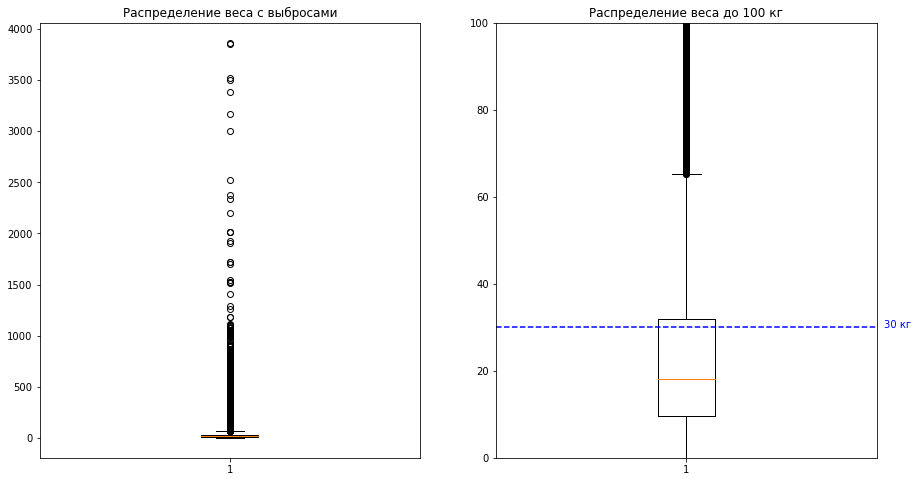

In [78]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(15, 8))

ax1.boxplot(orders['total_weight'])
ax1.set_title("Распределение веса с выбросами")

ax2.boxplot(orders['total_weight'])
ax2.set_title("Распределение веса до 100 кг")
plt.ylim((0,100))
plt.axhline(y=30, color='blue', linestyle='--')
plt.text(1.52, 30, "30 кг", color='blue')

plt.show()

In [82]:
print('Среднее значение веса в кг:', round(orders['total_weight'].mean(), 2))
print('Квартили:')
orders['total_weight'].quantile([0.25,0.5,0.75])

Среднее значение веса в кг: 26.95
Квартили:


0.25     9.70000
0.50    18.20000
0.75    31.96725
Name: total_weight, dtype: float64

In [76]:
print('Количество заказов больше 100 кг: {} шт.'.format(len(orders[orders['total_weight'] > 100])) )
print('Количество заказов на 0 кг: {} шт.'.format(len(orders[orders['total_weight'] == 0])))

Количество заказов больше 100 кг: 8900 шт.
Количество заказов на 0 кг: 588 шт.


На сайте [Сбермаркета в разедле "Доставка"](https://sbermarket.ru/delivery) для всех городов указано, что сверх 30 кг идет доплата 4-5 руб за каждый 1 кг сверх нормы. На графике до 100 кг пунктирной линией синего цвета показана эта граница. Видно, что у нас основная масса заказов примерно от 10 до 32 кг. т.е. основная масса заказов входит в промежуток "до 30 кг", которые дополнительно не оплачиваются. Есть также выбросы до 4000 кг. Если это не ошибка, то кто-то закупается в прок. Несмотря на странные заказы(больше 100 кг или 0 кг, которых в сумме 9488 шт.)среднее значени веса получилось 26,95 кг. Т.е. покупатели стараюстся не переплачивать за кг в основной своей массе и брать до 30 кг.

### Таблица с доставкой del_win <a id="step2.2"></a>

In [43]:
del_win[del_win['time_zone'] == 'Asia/Omsk']

,store_id,id,starts_at,ends_at,time_zone,hour_starts,hour_ends
222170,108,422089,2019-02-27 10:00:00,2019-02-27 12:00:00,Asia/Omsk,10,12
222218,108,422171,2019-03-05 14:00:00,2019-03-05 16:00:00,Asia/Omsk,14,16
222277,108,422171,2019-03-05 14:00:00,2019-03-05 16:00:00,Asia/Omsk,14,16
222283,108,422160,2019-03-05 03:00:00,2019-03-05 05:00:00,Asia/Omsk,3,5
222303,108,584747,2019-07-04 13:00:00,2019-07-04 15:00:00,Asia/Omsk,13,15
...,...,...,...,...,...,...,...
385244,108,638359,2019-08-04 10:00:00,2019-08-04 12:00:00,Asia/Omsk,10,12
385357,108,638362,2019-08-04 13:00:00,2019-08-04 15:00:00,Asia/Omsk,13,15
385411,108,638358,2019-08-04 09:00:00,2019-08-04 11:00:00,Asia/Omsk,9,11
385831,108,638359,2019-08-04 10:00:00,2019-08-04 12:00:00,Asia/Omsk,10,12


In [44]:
orders[orders['delivery_window_id'] == 422160]

,index,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
195182,195652,4367949,261160,0.0,0.0,2789,-250.0,26250,5,shipped,2019-03-05 04:46:37,2019-03-04 03:58:21,1574883,108,422160.0


In [16]:
print('Начало периода:', del_win['starts_at'].min())
print('Конец периода:', del_win['ends_at'].max())

Начало периода: 2018-01-05 08:00:00
Конец периода: 2019-08-04 22:00:00


In [17]:
del_win['hour_starts'] = del_win['starts_at'].dt.hour
del_win['hour_ends'] = del_win['ends_at'].dt.hour

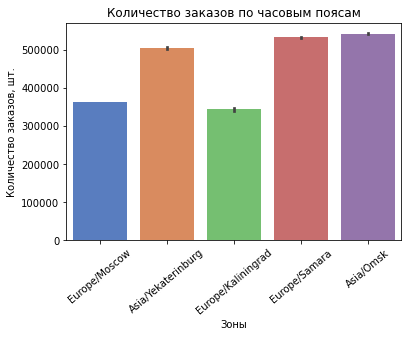

In [18]:
g = sns.barplot(x='time_zone', y='id', data=del_win, palette="muted")
g.set_title("Количество заказов по часовым поясам")
g.set_ylabel("Количество заказов, шт.")
g.set_xlabel("Зоны")
plt.xticks(rotation=40)
plt.show()

Т.к. временных зон несколько 5 шт., то нужно посмотреть пиковые часы для каждой из них и в целом?

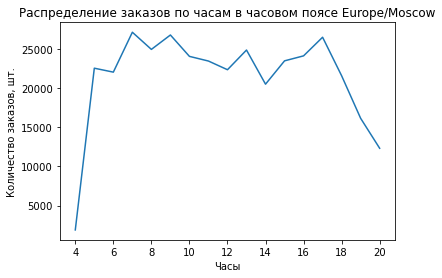

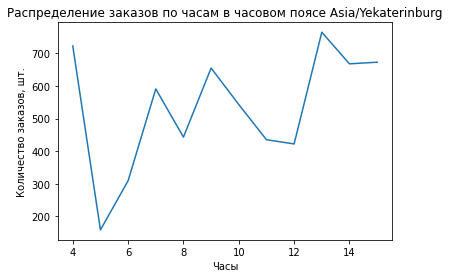

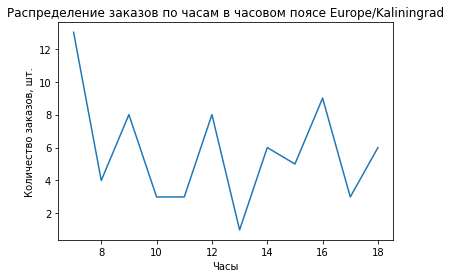

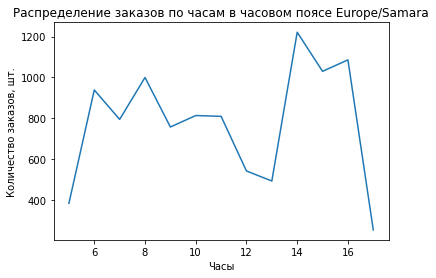

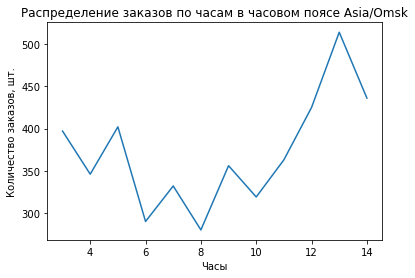

In [19]:
for i in del_win['time_zone'].unique():
    ax = sns.lineplot(x='hour_starts', y='id', data=del_win[del_win['time_zone'] == i]\
                      .groupby('hour_starts').agg({'id':'count'}).reset_index())
    ax.set_title("Распределение заказов по часам в часовом поясе " + i)
    ax.set_ylabel("Количество заказов, шт.")
    ax.set_xlabel("Часы")
    plt.show()

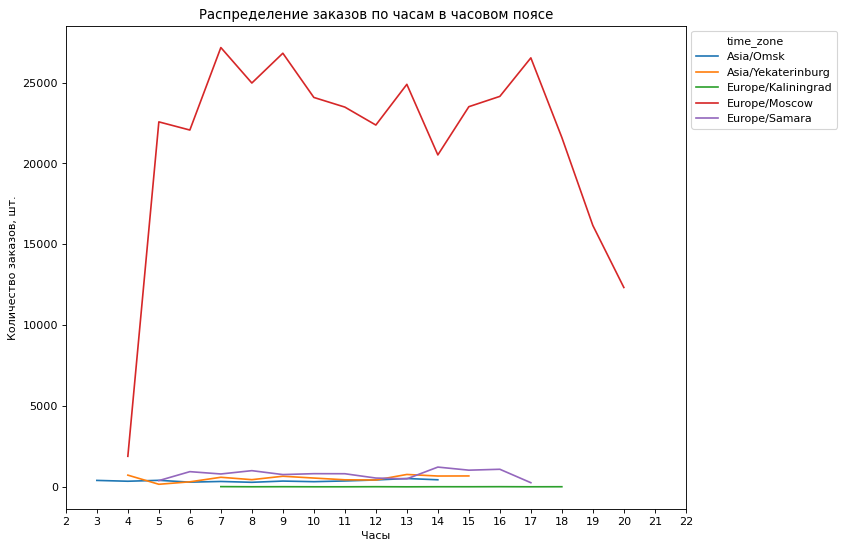

In [30]:
plt.figure(figsize=(10, 8), dpi= 80)
ax = sns.lineplot(x='hour_starts', y='id', hue='time_zone', data=del_win\
                      .groupby(['time_zone', 'hour_starts']).agg({'id':'count'}).reset_index())
ax.set_title("Распределение заказов по часам по разным зонам")
ax.set_ylabel("Количество заказов, шт.")
ax.set_xlabel("Часы")
plt.xticks(np.arange(2, 23, step=1))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Таблица с адресами  addresses<a id="step2.3"></a>

In [21]:
addresses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834883 entries, 0 to 834882
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   lat       834883 non-null  float64
 1   lon       834883 non-null  float64
 2   id        834883 non-null  int64  
 3   elevator  209818 non-null  object 
 4   floor     834883 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 31.8+ MB


### Таблица с заменными товарами replacements <a id="step2.4"></a>

Было бы интересно узнать есть ли товары, которые популярны и их часто заменяют, т.к. они заканчиваются.

In [22]:
replacements.head()

,order_id,item_id,state
0,3190332,5332717,replaced
1,3190332,5332761,replaced
2,3097213,5332862,replaced
3,3097213,5332917,replaced
4,3188867,5440591,replaced


In [23]:
rep_products = replacements['item_id'].value_counts().reset_index()
rep_products.columns = ['item_id', 'count']
print('Количество замененных продуктов:', len(rep_products))
rep_products[rep_products['count'] > 1]

Количество замененных продуктов: 328142


,item_id,count
0,5798455,6
1,5981379,5
2,5342624,4
3,5837528,4
4,5615529,4
...,...,...
146,5976632,2
147,5850037,2
148,5523592,2
149,6044837,2


В таблице **rep_products** представлены товары, которые заменялись за весь период больше, чем 1 раз. Их немного всего 151 из 328142(0,04%). В таблице даже есть "лидеры" — продукты, которые заменялись больше всего. Это id 5798455 и 5981379. Возможно, стоит в приложении прописывать для подобных продуктов замены заранее. Например, в карточке товара снизу прописано, что товар популярный и может его на полках не будет и картинка альтернативного товара, чтобы клиент сразу его смог заказать или ознакомиться.

### Таблица  <a id="step2.5"></a>

## Вывод по проекту  <a id="step3"></a>

Мысли, что пришли на проверку:
- [ ] проверить пиковые часы доставки. 
- [ ] посмотреть на промокоды. такое впечателние, что есть ошибка, т.к. разные стоимости до и после применения промокода, но сам промокод не прописан
- [ ] по широте и долготе определить в какие города/ части города доставляется больше и меньше всего. посмотреть по городам нужно ли расширение
- [ ] Когда создаются заказы?
- [ ] нагрузка на определенный магазин есть? может поэтому там много чего нет
- [X] есть ли товары, которые часто заменяются? можно ли сразу в приложении указать, что товар лимитирован и вот его аналог?
- [ ] возможность собирать несколько магазинов, а не брать все в одном.